In [1]:
from copy import deepcopy
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

from pandeia.engine.source import Source
from pandeia.engine.astro_spectrum import AstroSpectrum
from pandeia.engine.astro_spectrum import SpectralLine
from pandeia.engine.io_utils import read_json

In [28]:
line_conf = {
    "center": 10.0,
    "width": 1000.0,
    "strength": 1.0e-16,
    "profile": "gaussian",
    "emission_or_absorption": "emission"
}

line_conf2 = {
    "center": 11.0,
    "width": 1000.0,
    "strength": 1.0e-16,
    "profile": "gaussian",
    "emission_or_absorption": "emission"
}

line_conf3 = {
    "center": 9.0,
    "width": 100000.0,
    "strength": 1.0e-14,
    "profile": "gaussian",
    "emission_or_absorption": "emission"
}

line_conf4 = {
    "center": 1.0,
    "width": 10000.0,
    "strength": 1000.0,
    "profile": "gaussian",
    "emission_or_absorption": "absorption"
}
phx_test = read_json("/Users/pickering/STScI/smite/pandeia_test/tests/engine/jwst/sed/defaults/phoenix.jeng")
phx_src = phx_test['scene'][0]

phx_src

{'id': 1,
 'position': {'orientation': 0.0, 'x_offset': 0.0, 'y_offset': 0.0},
 'shape': {'geometry': 'point'},
 'spectrum': {'lines': [],
  'name': 'generic source',
  'normalization': {'norm_flux': 0.1,
   'norm_fluxunit': 'mjy',
   'norm_wave': 2.0,
   'norm_waveunit': 'microns',
   'type': 'at_lambda'},
  'redshift': 0.0,
  'sed': {'log_g': 4.0,
   'metallicity': 0.0,
   'sed_type': 'phoenix',
   'teff': 5000.0}}}

In [29]:
phx_src_line = deepcopy(phx_test['scene'][0])
phx_src_line['spectrum']['lines'] = [line_conf, line_conf2, line_conf3, line_conf4]

src = Source(config=phx_src)
src_line = Source(config=phx_src_line)

src_line.spectrum

{'lines': [{'center': 10.0,
   'emission_or_absorption': 'emission',
   'profile': 'gaussian',
   'strength': 1e-16,
   'width': 1000.0},
  {'center': 11.0,
   'emission_or_absorption': 'emission',
   'profile': 'gaussian',
   'strength': 1e-16,
   'width': 1000.0},
  {'center': 9.0,
   'emission_or_absorption': 'emission',
   'profile': 'gaussian',
   'strength': 1e-14,
   'width': 100000.0},
  {'center': 1.0,
   'emission_or_absorption': 'absorption',
   'profile': 'gaussian',
   'strength': 1000.0,
   'width': 10000.0}],
 'name': 'generic source',
 'normalization': {'norm_flux': 0.1,
  'norm_fluxunit': 'mjy',
  'norm_wave': 2.0,
  'norm_waveunit': 'microns',
  'type': 'at_lambda'},
 'redshift': 0.0,
 'sed': {'log_g': 4.0,
  'metallicity': 0.0,
  'sed_type': 'phoenix',
  'teff': 5000.0},
 'spectrum_parameters': ['redshift', 'normalization', 'sed']}

In [30]:
spec = AstroSpectrum(src)

spec_line = AstroSpectrum(src_line)

/Users/pickering/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_maximum(a, axis, None, out, keepdims)


In [31]:
l = SpectralLine(line_conf)

spec.wave.min(), spec.wave.max()

(0.001, 995.4054173515276)

<IPython.core.display.Javascript object>


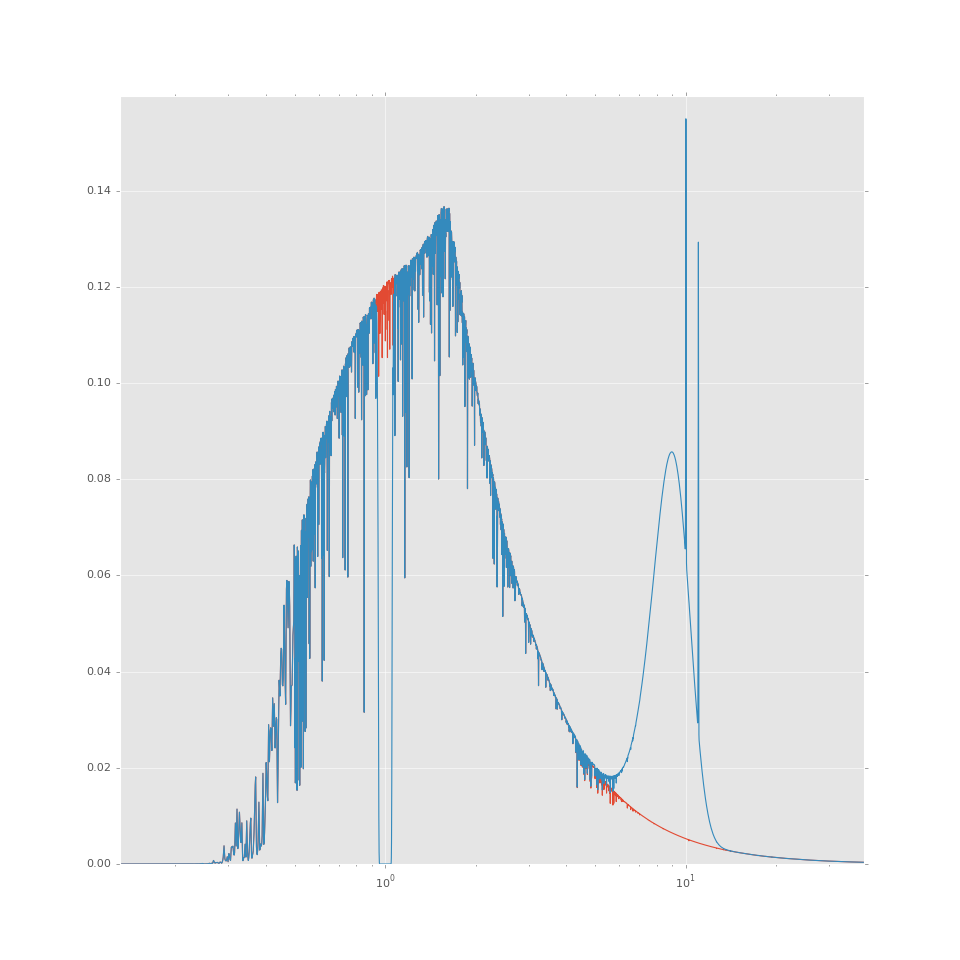

In [32]:
f = plt.figure(figsize=(12, 12))
plt.plot(spec.wave, spec.flux)
plt.plot(spec_line.wave, spec_line.flux)
#plt.plot(spec.wave, spec_line.flux - spec.flux)
plt.semilogx()
plt.show()

In [7]:
spec_line.wave.size

10099

In [ ]:
halves = spec.wave[0:-1] + 0.5*np.diff(spec.wave)

In [ ]:
halves

In [ ]:
spec.wave

In [ ]:
new = np.append(spec.wave, halves)

In [ ]:
new

In [ ]:
new.sort()

In [ ]:
new